# I. INTRODUCTION

You are a real estate businessman or customer . You want buy a new house with cheap price or find a way to sale house with competitive price. You had more information about home in area at the past. But dont know how to predict price home that you like at now. Yeah this is my goal for this project . I use dataset "Melbourne Housing Market"(https://www.kaggle.com/anthonypino/melbourne-housing-market) as example. However, you must certainly considered when you want use my final result.

Import all library we need in this project.

In [136]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

# II. TRANSFORMS DATA 

 ## Import data

In [137]:
price_house = pd.read_csv('Melbourne_housing_FULL.csv')
price_house

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.79690,144.99690,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,6/08/2016,2.5,3067.0,...,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,-37.79650,144.99650,Northern Metropolitan,4019.0
8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,6/08/2016,2.5,3067.0,...,1.0,2.0,201.0,NaN,1900.0,Yarra City Council,-37.79950,144.99740,Northern Metropolitan,4019.0
9,Abbotsford,99 Turner St,2,h,NaN,S,Collins,6/08/2016,2.5,3067.0,...,2.0,1.0,202.0,NaN,1900.0,Yarra City Council,-37.79960,144.99890,Northern Metropolitan,4019.0


In [138]:
price_house.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [139]:
price_house.shape

(34857, 21)

## Check quality data

In [140]:
# Looking for NaN
display(price_house.isnull().any())

Suburb           False
Address          False
Rooms            False
Type             False
Price             True
Method           False
SellerG          False
Date             False
Distance          True
Postcode          True
Bedroom2          True
Bathroom          True
Car               True
Landsize          True
BuildingArea      True
YearBuilt         True
CouncilArea       True
Lattitude         True
Longtitude        True
Regionname        True
Propertycount     True
dtype: bool

We have so many feature has missing data . So the first, we check how about rows is mising in one feature.

In [141]:
print(price_house.info())
print(price_house.isnull().sum()/len(price_house)*100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

Yeah with "price_house.info()" we can see all most we need about dataset. We have 2 features : "YearBuilt" and  "BuildingArea" is so many missing value( 55.386293% and 60.576068% ). So we can delete 2 features . Maybe this can not too much influence.

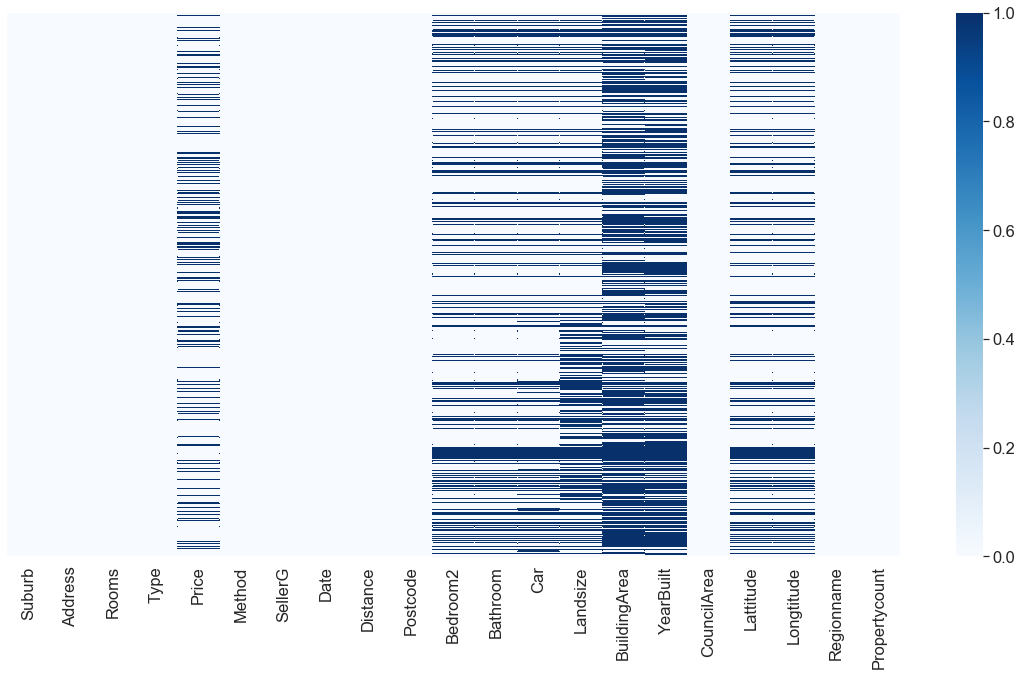

In [106]:
# Visualize missing values
fig, ax = plt.subplots(figsize=(20,10))
sns.set(font_scale=1.5)
sns.heatmap(price_house.isnull(),yticklabels = False, cmap = 'Blues')
plt.show()

This is a figure about missing data . In darker the blue represent for high missing data. And this is significant amount of missing values in Price, Bathroom,Bedroom2, Car, Landsize, Building Area, YearBuilt, Lattitude, and Longitude.

## Outliers

In [142]:
price_house.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


I see in so many outliers point in this data . Example : In feature Distance has min(distance)=0 ,Bedroom2=0 ,Bathroom=0...Now we find all point outlier.

In [143]:
price_house[price_house['BuildingArea']==0].head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
7211,North Melbourne,19 Shands La,2,t,841000.0,S,Jellis,4/03/2017,2.3,3051.0,...,1.0,1.0,215.0,0.0,2000.0,Melbourne City Council,-37.79530,144.94370,Northern Metropolitan,6821.0
19775,Balwyn North,14 Wanbrow Av,5,h,1950000.0,S,RT,3/09/2017,9.7,3104.0,...,3.0,2.0,743.0,0.0,1949.0,Boroondara City Council,-37.80235,145.09311,Southern Metropolitan,7809.0
19840,Bundoora,22 Moreton Cr,3,h,814000.0,S,Barry,3/09/2017,12.1,3083.0,...,1.0,2.0,542.0,0.0,1970.0,Banyule City Council,-37.70861,145.05691,Northern Metropolitan,10175.0
20038,Heidelberg Heights,8 Thames St,3,h,NaN,SN,Miles,3/09/2017,8.8,3081.0,...,1.0,2.0,658.0,0.0,1920.0,Banyule City Council,-37.75287,145.05547,Eastern Metropolitan,2947.0
20223,Roxburgh Park,16 Sandover Dr,4,h,570000.0,S,Raine,3/09/2017,20.6,3064.0,...,2.0,2.0,504.0,0.0,2000.0,Hume City Council,-37.61419,144.93448,Northern Metropolitan,5833.0


In [144]:
print(len(price_house[price_house['BuildingArea']==0]))
print(len(price_house[price_house['Distance']==0]))
print(len(price_house[price_house['Bedroom2']==0]))
print(len(price_house[price_house['Landsize']==0]))



76
77
17
2437


We have 76 rows have 'BuildingArea' = 0.
We have 77 rows have 'Distance' = 0.
We have 76 rows have 'Bedroom2' = 0.
We have 76 rows have 'Landsize' = 0.
So I decided remove all rows has attribute = 0.


In [145]:
# Remove outlier
price_house = price_house[price_house['BuildingArea']!=0]
price_house = price_house[price_house['Distance']!=0]
price_house = price_house[price_house['Bedroom2']!=0]
price_house = price_house[price_house['Landsize']!=0]
price_house

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.79690,144.99690,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,6/08/2016,2.5,3067.0,...,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,-37.79650,144.99650,Northern Metropolitan,4019.0
8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,6/08/2016,2.5,3067.0,...,1.0,2.0,201.0,NaN,1900.0,Yarra City Council,-37.79950,144.99740,Northern Metropolitan,4019.0
9,Abbotsford,99 Turner St,2,h,NaN,S,Collins,6/08/2016,2.5,3067.0,...,2.0,1.0,202.0,NaN,1900.0,Yarra City Council,-37.79960,144.99890,Northern Metropolitan,4019.0
10,Abbotsford,129 Charles St,2,h,941000.0,S,Jellis,7/05/2016,2.5,3067.0,...,1.0,0.0,181.0,NaN,NaN,Yarra City Council,-37.80410,144.99530,Northern Metropolitan,4019.0


## Hand-on with missing data

In [146]:
# Remove rows missing data
price_house = price_house.dropna()
print(price_house.shape)
price_house.head()

(7822, 21)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019.0
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019.0


After i remove all rows outliers and missing data . We have dataset with 21 features and 7822 samples . I think it enough for model.

## Visualization

 I will take a look at the relationships between the target variable and categorical features. Suburb, Address, and Postcode are measures based on location. Better than using all of these features in the analysis, Regionname would be the best represent for home location to use in analysis .

In [148]:
price_house['Regionname'] = price_house['Regionname'].map({'Northern Metropolitan':'NM',
                                            'Western Metropolitan':'WM', 
                                            'Southern Metropolitan':'SM', 
                                            'Eastern Metropolitan':'EM', 
                                            'South-Eastern Metropolitan':'SEM', 
                                            'Northern Victoria':'NV',
                                            'Eastern Victoria':'EV',
                                            'Western Victoria':'WV'})


C:\Users\nhdhc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


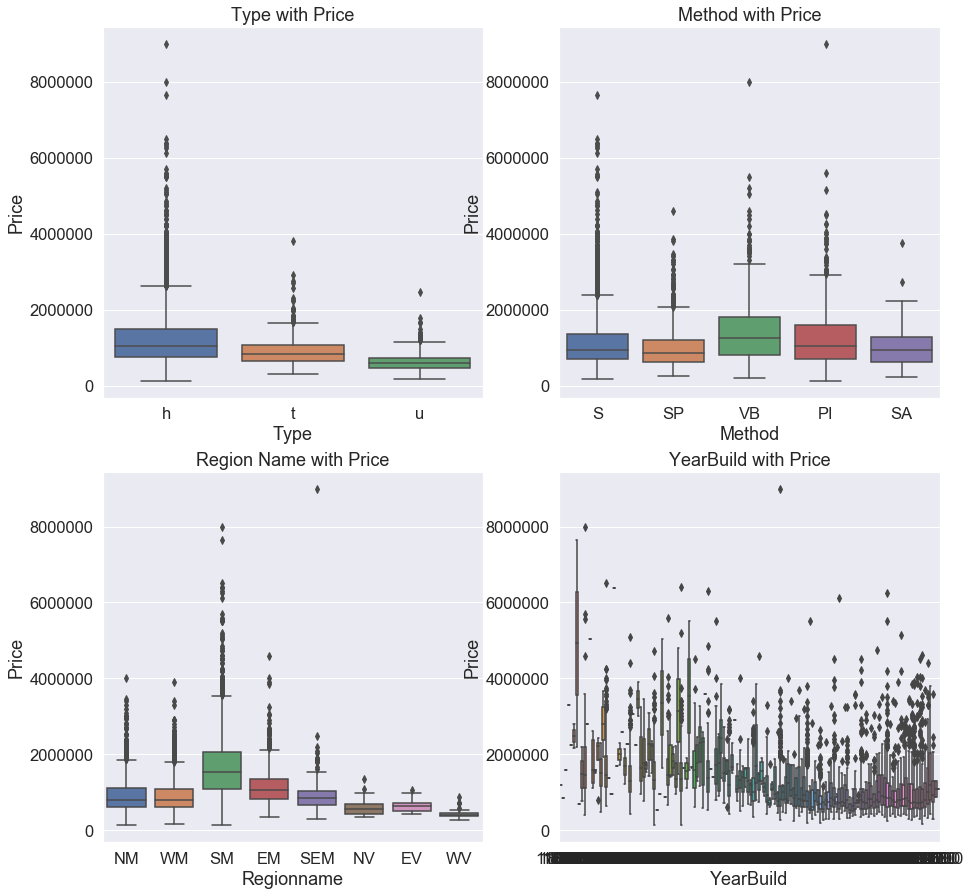

In [158]:
# Suplots of categorical features v price
sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize = (15,15))

# Plot [0,0]
sns.boxplot(data = price_house, x = 'Type', y = 'Price', ax = axes[0,0])
axes[0,0].set_xlabel('Type')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Type with Price')

# Plot [0,1]
sns.boxplot(x = 'Method', y = 'Price', data = price_house, ax = axes[0,1])
axes[0,1].set_xlabel('Method')
#axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Method with Price')

# Plot [1,0]
sns.boxplot(x = 'Regionname', y = 'Price', data = price_house, ax = axes[1,0])
axes[1,0].set_xlabel('Regionname')
#axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Region Name with Price')

# Plot [1,1]
sns.boxplot(x = 'YearBuilt', y = 'Price', data = price_house, ax = axes[1,1])
axes[1,1].set_xlabel('YearBuild')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('YearBuild with Price')

plt.show()


* Median prices for houses are over \$1M, townhomes are \$800k - \$900k and units are approx \$500k.    
* Home prices with different selling methods are sames.    
* Median prices in the Metropolitan Region are higher than than that of Victoria Region - with Southern Metro being the area with the highest median home price (~\$1.3M).  
* With house is yearbuild is small-that mean it is type of historic house. Historic house has high price.

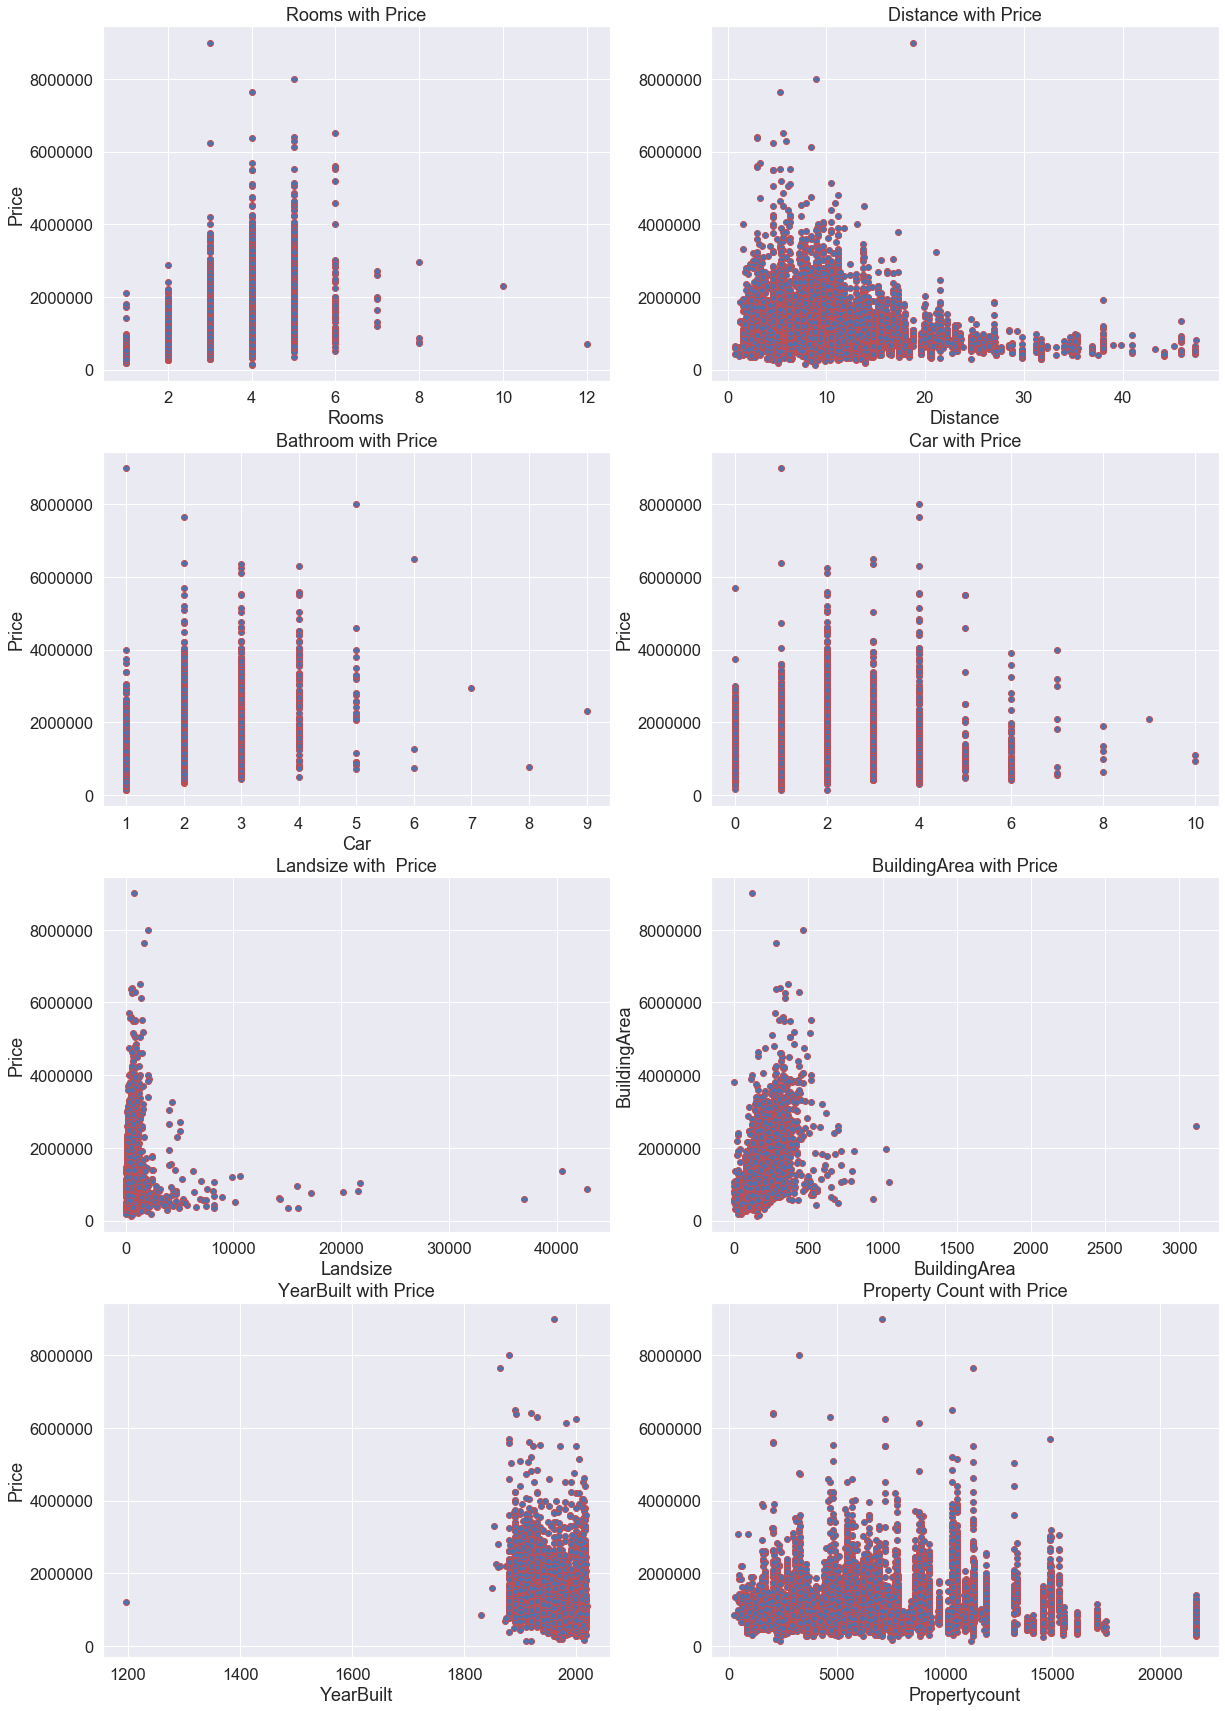

In [161]:
# Suplots of numeric features v price
sns.set_style('darkgrid')
f, axes = plt.subplots(4,2, figsize = (20,30))

# Plot [0,0]
axes[0,0].scatter(x = 'Rooms', y = 'Price', data = price_house, edgecolor = 'r')
axes[0,0].set_xlabel('Rooms')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Rooms with Price')

# Plot [0,1]
axes[0,1].scatter(x = 'Distance', y = 'Price', data = price_house, edgecolor = 'r')
axes[0,1].set_xlabel('Distance')
# axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Distance with Price')

# Plot [1,0]
axes[1,0].scatter(x = 'Bathroom', y = 'Price', data = price_house, edgecolor = 'r')
axes[1,0].set_xlabel('Bathroom')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Bathroom with Price')

# Plot [1,1]
axes[1,1].scatter(x = 'Car', y = 'Price', data = price_house, edgecolor = 'r')
axes[1,0].set_xlabel('Car')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Car with Price')

# Plot [2,0]
axes[2,0].scatter(x = 'Landsize', y = 'Price', data = price_house, edgecolor = 'r')
axes[2,0].set_xlabel('Landsize')
axes[2,0].set_ylabel('Price')
axes[2,0].set_title('Landsize with  Price')

# Plot [2,1]
axes[2,1].scatter(x = 'BuildingArea', y = 'Price', data = price_house, edgecolor = 'r')
axes[2,1].set_xlabel('BuildingArea')
axes[2,1].set_ylabel('BuildingArea')
axes[2,1].set_title('BuildingArea with Price')

# Plot [3,0]
axes[3,0].scatter(x = 'YearBuilt', y = 'Price', data = price_house, edgecolor = 'r')
axes[3,0].set_xlabel('YearBuilt')
axes[3,0].set_ylabel('Price')
axes[3,0].set_title('YearBuilt with Price')

# Plot [3,1]
axes[3,1].scatter(x = 'Propertycount', y = 'Price', data = price_house, edgecolor = 'r')
axes[3,1].set_xlabel('Propertycount')
#axes[3,1].set_ylabel('Price')
axes[3,1].set_title('Property Count with Price')

plt.show()

* Almost house has 4,5,6 are high price.
* Homes is near Center is high.    


## Correlation

Text(0.5, 1, 'Variable Correlation')

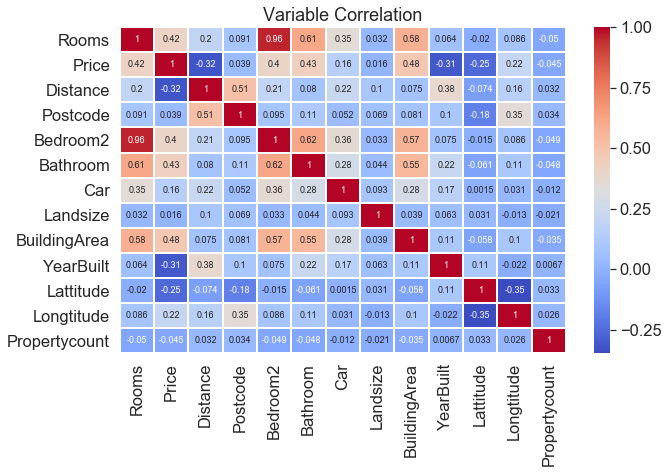

In [162]:
plt.figure(figsize=(10,6))
sns.heatmap(price_house.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation')

* Rooms and Bedroom2 is strong correlation


## Selection Model : LINEAR REGRESSION

In [167]:
# Split
# Create features variable 
X =price_house[['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 
            'BuildingArea', 'Propertycount','YearBuilt']]

# Create target variable
y = price_house['Price']

# Train, test, split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .20, random_state= 42)

In [170]:
# Fit
# Import model
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

# Create linear regression object
reg_all= linear_model.LinearRegression()

# Fit model to training data
reg_all.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [171]:
# Predict
# Predicting test set results
y_pred = reg_all.predict(X_test)

In [175]:
#Compute and print R^2 and RMSE
from sklearn.metrics import mean_squared_error
print("R^2: {}".format(reg_all.score(X_test,y_test)))
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Erro : {}".format(rmse))

R^2: 0.48740742966538575
Root Mean Squared Erro : 476654.33789741265


RMSE tells us explicitly how much our predictions deviate, on average, from the actual values in the dataset. In this case, our predicted values are $476654.33 away from the actual value.

## Using cross_validation

In [178]:
from sklearn.model_selection import cross_val_score
cvscore_10= cross_val_score(reg,X,y,cv=10)
print(np.mean(cvscore_10))

0.4851850199949972


# III.CONCLUSION
## I have  overfitting when i predict price house . Because with RMSE  our predicted values are \$476654.33 away from the actual value. This is actually high value can not accept.  